In [32]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
media = pd.read_csv('mediacompany.csv')
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,Unnamed: 7
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,NaN
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,NaN
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,NaN
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,NaN
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,NaN


In [34]:
media.shape

(80, 8)

In [35]:
media.isnull().sum()

Date                    0
Views_show              0
Visitors                0
Views_platform          0
Ad_impression           0
Cricket_match_india     0
Character_A             0
Unnamed: 7             80
dtype: int64

In [36]:
## Dropping the column Unnamed: 7

media.dropna(how="all", axis=1, inplace=True)

In [37]:
media.isnull().sum()

Date                   0
Views_show             0
Visitors               0
Views_platform         0
Ad_impression          0
Cricket_match_india    0
Character_A            0
dtype: int64

In [38]:
media.dropna(how="all", axis=0, inplace=True)

In [39]:
media.shape

(80, 7)

In [40]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [41]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Date                 80 non-null     object
 1   Views_show           80 non-null     int64 
 2   Visitors             80 non-null     int64 
 3   Views_platform       80 non-null     int64 
 4   Ad_impression        80 non-null     int64 
 5   Cricket_match_india  80 non-null     int64 
 6   Character_A          80 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 4.5+ KB


In [42]:
## Converting the column "Date" to datetime format

media['Date'] = pd.to_datetime(media['Date']) ## OR 
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,2017-03-01,183738,1260228,1706478,1060860448,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0
4,2017-03-05,446314,1594712,2041418,1357736987,0,0


In [43]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 80 non-null     datetime64[ns]
 1   Views_show           80 non-null     int64         
 2   Visitors             80 non-null     int64         
 3   Views_platform       80 non-null     int64         
 4   Ad_impression        80 non-null     int64         
 5   Cricket_match_india  80 non-null     int64         
 6   Character_A          80 non-null     int64         
dtypes: datetime64[ns](1), int64(6)
memory usage: 4.5 KB


In [50]:
## Deriving days since the show started
from datetime import date

d0 = date(2017, 2, 28)
d1 = pd.DatetimeIndex(media['Date']).date

delta = d1 - d0
media['day']= delta

In [51]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1 days
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2 days
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3 days
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4 days
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5 days


In [57]:
media.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype          
---  ------               --------------  -----          
 0   Date                 80 non-null     datetime64[ns] 
 1   Views_show           80 non-null     int64          
 2   Visitors             80 non-null     int64          
 3   Views_platform       80 non-null     int64          
 4   Ad_impression        80 non-null     int64          
 5   Cricket_match_india  80 non-null     int64          
 6   Character_A          80 non-null     int64          
 7   day                  80 non-null     timedelta64[ns]
dtypes: datetime64[ns](1), int64(6), timedelta64[ns](1)
memory usage: 5.1 KB


In [65]:
media['day'] = media['day'].astype("str")
media['day'] = media['day'].map(lambda x: x.strip('days'))
media['day'] = media['day'].astype("int")

In [66]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5


## Univariate Analysis

## 1. Categorical Variables

In [71]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = media[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}: \n {}".format(variable,varValue))

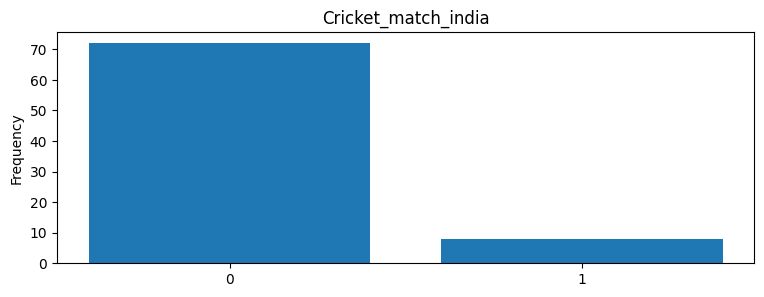

Cricket_match_india: 
 0    72
1     8
Name: Cricket_match_india, dtype: int64


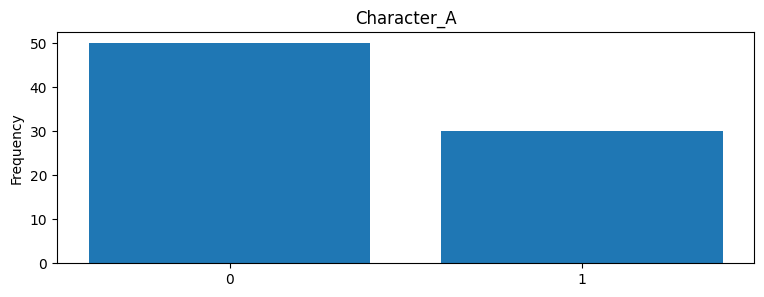

Character_A: 
 0    50
1    30
Name: Character_A, dtype: int64


In [75]:
## categorical_media = media.select_dtypes(exclude='number')
for col in media:
    num_unique_value = media[col].nunique()
    if num_unique_value <= 10:
        bar_plot(col)

## 2. Numerical Variables

In [76]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(media[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

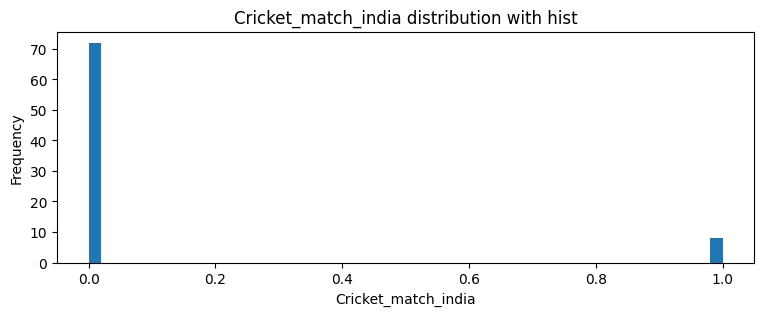

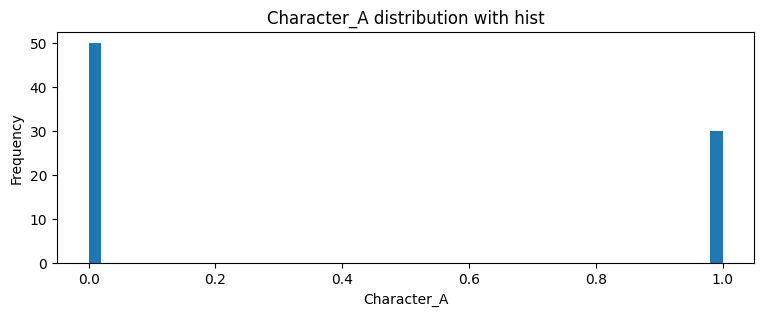

In [78]:
num_df_columns = media.select_dtypes(include='number')
for col in num_df_columns:
    num_unique_value = media[col].nunique()
    if num_unique_value != num_df_columns.shape[0]:
        plot_hist(col)

## 3. Information value

In [79]:
def calculate_woe_iv(dataset, feature_b, target, targetcat):
    
    dataset[feature_b].replace([np.inf, -np.inf], np.nan, inplace = True)
     
    
    
    if dataset[feature_b].dtype in ['float64', 'int64']:
        #dataset[dataset[feature_b]< 0][feature_b] = 0
        dataset['feature'] = pd.qcut(dataset[feature_b], q = [0, .05, .1, .2,.4, .6, .8,0.9,0.95, 1],
                                     duplicates = 'drop', precision = 0).values.add_categories(['Missing', 'Others'])
    else:
        dataset['feature'] = dataset[feature_b]

    dataset['feature'].fillna('Missing', inplace = True)

    lst = []
    num_rows = dataset.shape[0]

    val_list = dataset['feature'].unique()
    for val in val_list:
        occ_val = dataset[dataset['feature'] == val].count()['feature']
        if occ_val < 0.005 * num_rows :
            dataset['feature'] = np.where(dataset['feature'] == val, 'Others', dataset['feature'])

    val_list = dataset['feature'].unique()
    for val in val_list:
        lst.append({
        'Feature': feature_b,
        'Value': val,
        'Min_val': dataset[dataset['feature'] == val].min()[feature_b],
        'All': dataset[dataset['feature'] == val].count()['feature'],
        'Good': dataset[(dataset['feature'] == val) & (dataset[target] != targetcat)].count()['feature'],
        'Bad': dataset[(dataset['feature'] == val) & (dataset[target] == targetcat)].count()['feature']
        })

    dset = pd.DataFrame(lst)
    dset['Event_Rate'] = dset['Bad'] / dset['All']
    dset['Prop'] = dset['All'] / dset['All'].sum()
    dset['Prop_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Prop_Bad'] = dset['Bad'] / dset['Bad'].sum()
    dset['WoE'] = np.log(dset['Prop_Good'] / dset['Prop_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Prop_Good'] - dset['Prop_Bad']) * dset['WoE']

    iv = dset['IV'].sum()

    dset = dset.sort_values(by = 'Min_val')

    return dset, iv

Information Value :  Date  -  0.0
Information Value :  Views_show  -  0.0
Information Value :  Visitors  -  0.0
Information Value :  Views_platform  -  0.0
Information Value :  Ad_impression  -  0.0
Information Value :  Cricket_match_india  -  0.0
Information Value :  Character_A  -  0.0
Information Value :  day  -  0.0


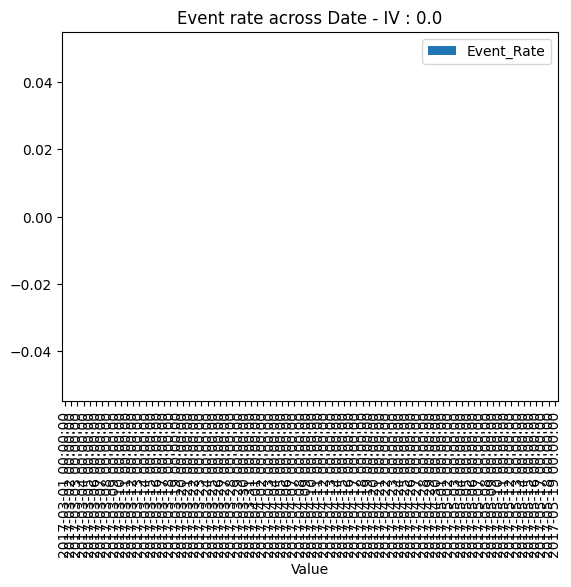

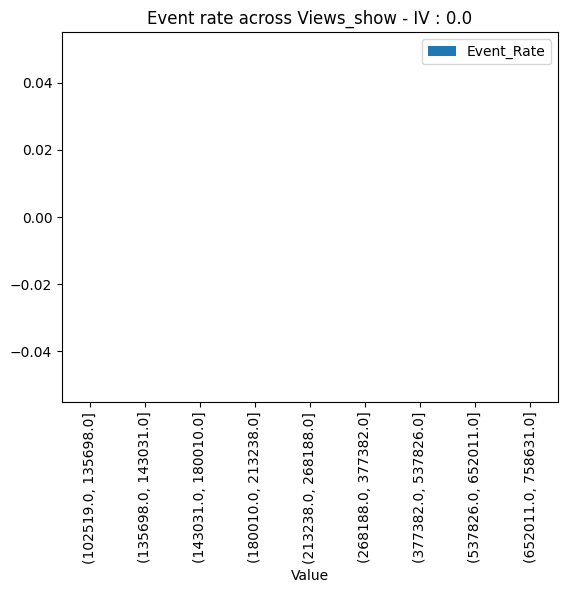

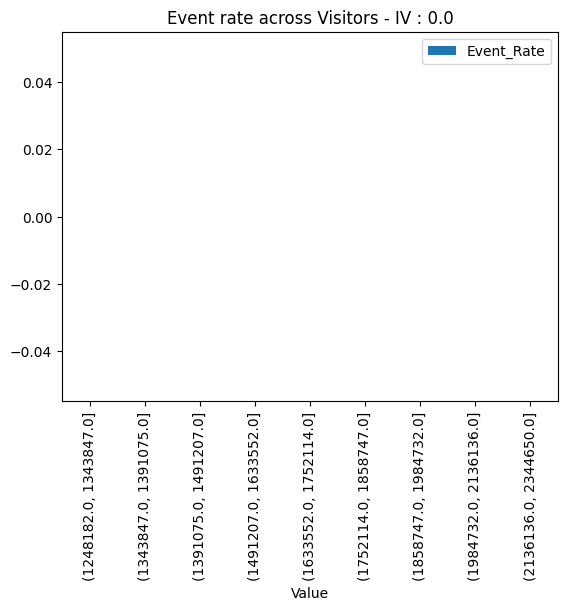

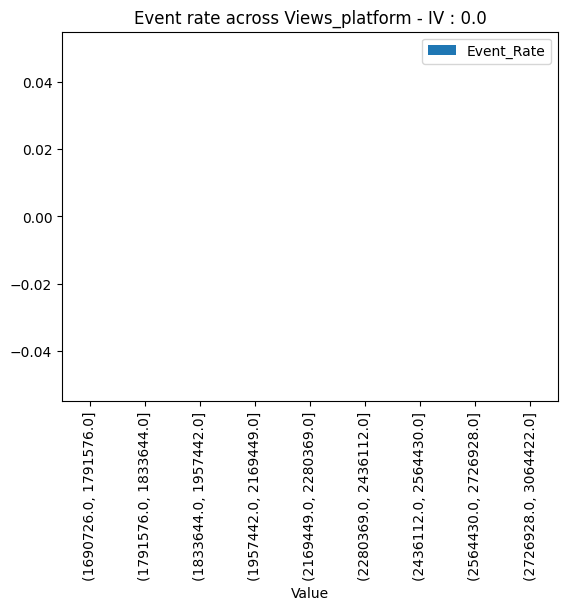

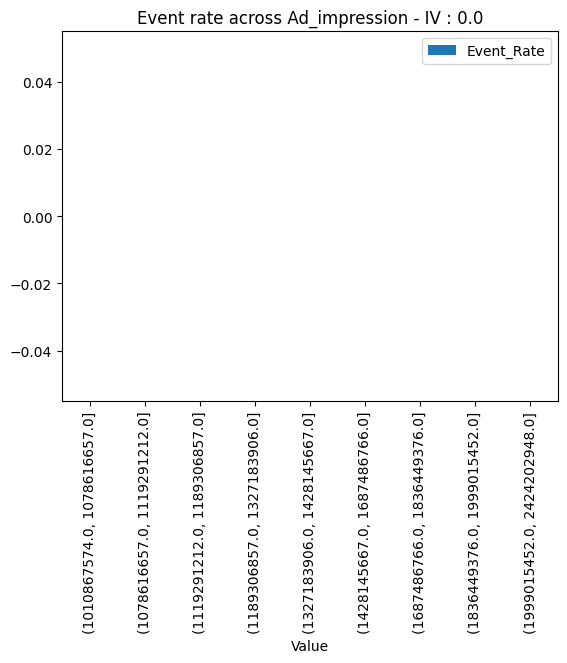

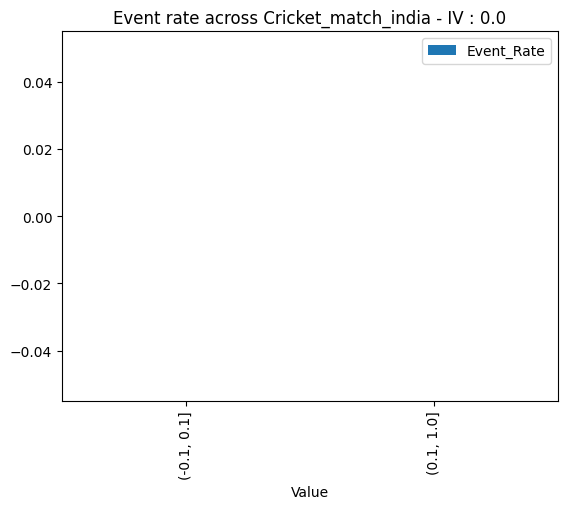

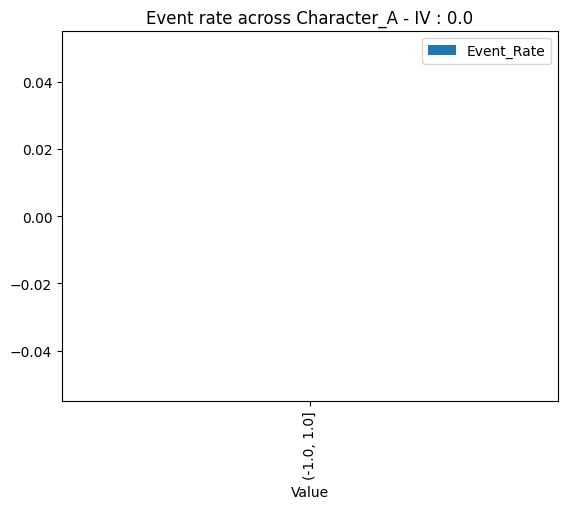

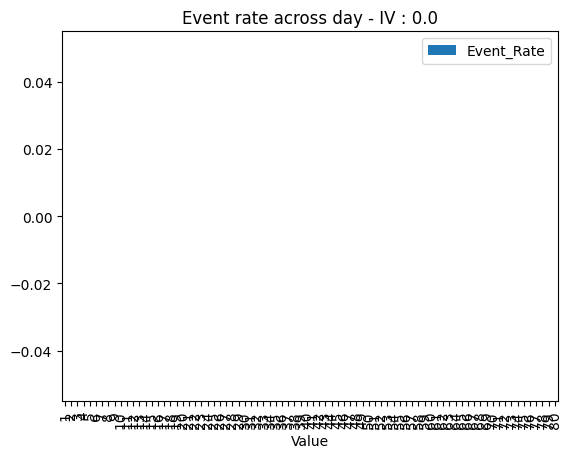

In [81]:
## Calling the function

column_of_interest = 'Views_show'   #Give the column name which has target feature here ( Ensure that target column has !/0 values, preferably 1 for Default/ 0 for non default)

for feat in media.columns:
    dset, iv = calculate_woe_iv(media,feat , column_of_interest , 1)
    print("Information Value : ",  feat , " - ", iv)
    dset[['Value','Event_Rate']].plot.bar(x= "Value", y='Event_Rate', title= ("Event rate across " + feat + " - IV : " + str(iv) ) )


<AxesSubplot: xlabel='day'>

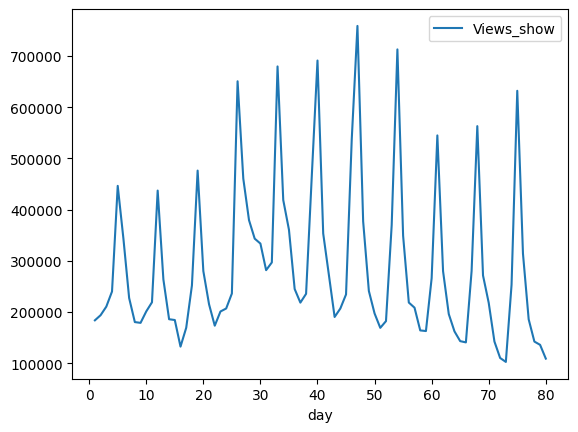

In [82]:
# days vs Views_show
media.plot.line(x='day', y='Views_show')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


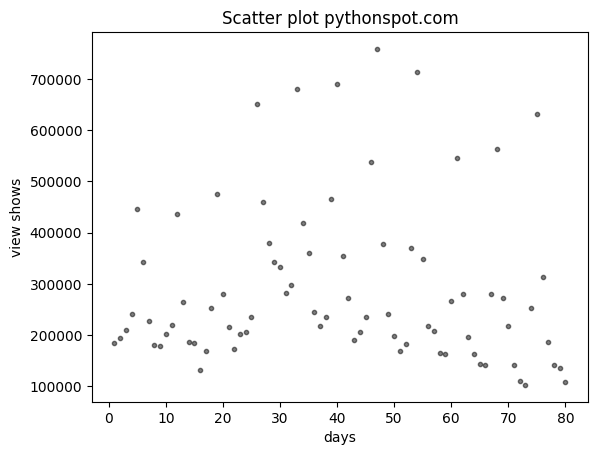

In [85]:
# Scatter Plot (days vs Views_show)
colors = (0,0,0)
area = np.pi*3
plt.scatter(media.day, media.Views_show, s=area, c=colors, alpha=0.5)
plt.title('Scatter plot pythonspot.com')
plt.xlabel('days')
plt.ylabel('view shows')
plt.show()

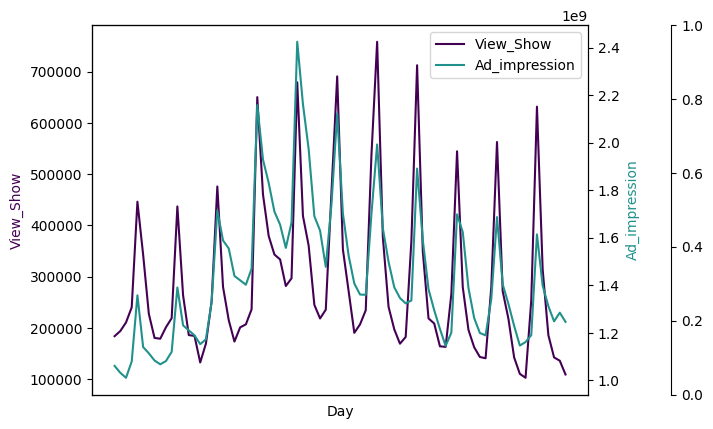

In [86]:
# plot for days vs Views_show and days vs Ad_impressions

fig = plt.figure()
host = fig.add_subplot(111)

par1 = host.twinx()
par2 = host.twinx()

host.set_xlabel("Day")
host.set_ylabel("View_Show")
par1.set_ylabel("Ad_impression")

color1 = plt.cm.viridis(0)
color2 = plt.cm.viridis(0.5)
color3 = plt.cm.viridis(.9)

p1, = host.plot(media.day,media.Views_show, color=color1,label="View_Show")
p2, = par1.plot(media.day,media.Ad_impression,color=color2, label="Ad_impression")

lns = [p1, p2]
host.legend(handles=lns, loc='best')

# right, left, top, bottom
par2.spines['right'].set_position(('outward', 60))      
# no x-ticks                 
par2.xaxis.set_ticks([])
# Sometimes handy, same for xaxis
#par2.yaxis.set_ticks_position('right')

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())

plt.savefig("pyplot_multiple_y-axis.png", bbox_inches='tight')

In [88]:
# Derived Metrics
# Weekdays are taken such that 1 corresponds to Sunday and 7 to Saturday
# Generate the weekday variable
media['weekday'] = (media['day']+3)%7
media.weekday.replace(0,7, inplace=True)
media['weekday'] = media['weekday'].astype(int)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,feature,weekday
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,1,4
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,2,5
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,3,6
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,4,7
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,5,1


## Running first model (lm1) Weekday & visitors

In [89]:
from sklearn.linear_model import LinearRegression

# Putting feature variable to X
X = media[['Visitors','weekday']]

# Putting response variable to y
y = media['Views_show']

# Representing LinearRegression as lr(Creating LinearRegression Object)
lm = LinearRegression()

# fit the model to the training data
lm.fit(X,y)

LinearRegression()

In [91]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.params)
print(lm_1.summary())

const      -38615.112787
Visitors        0.278681
weekday    -35908.350137
dtype: float64
                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.485
Model:                            OLS   Adj. R-squared:                  0.472
Method:                 Least Squares   F-statistic:                     36.26
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           8.01e-12
Time:                        20:32:28   Log-Likelihood:                -1042.5
No. Observations:                  80   AIC:                             2091.
Df Residuals:                      77   BIC:                             2098.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [92]:
# create Weekend variable, with value 1 at weekends and 0 at weekdays
def cond(i):
    if i % 7 == 5: return 1
    elif i % 7 == 4: return 1
    else :return 0
    return i

media['weekend']=[cond(i) for i in media['day']]

In [93]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,feature,weekday,weekend
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,1,4,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,2,5,0
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,3,6,0
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,4,7,1
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,5,1,1


## Running second model (lm2) visitors & weekend

In [94]:
# Putting feature variable to X
X = media[['Visitors','weekend']]

# Putting response variable to y
y = media['Views_show']

In [95]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           2.51e-12
Time:                        20:35:38   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

## Running third model (lm3) visitors, weekend & Character_A

In [97]:
# Putting feature variable to X
X = media[['Visitors','weekend','Character_A']]

# Putting response variable to y
y = media['Views_show']

In [98]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_3 = sm.OLS(y,X).fit()
print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.570
Method:                 Least Squares   F-statistic:                     35.84
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           1.53e-14
Time:                        20:37:21   Log-Likelihood:                -1033.8
No. Observations:                  80   AIC:                             2076.
Df Residuals:                      76   BIC:                             2085.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -4.722e+04   9.31e+04     -0.507      

In [99]:
# Create lag variable
media['Lag_Views'] = np.roll(media['Views_show'], 1)
media.Lag_Views.replace(108961,0, inplace=True)

In [100]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,day,feature,weekday,weekend,Lag_Views
0,2017-03-01,183738,1260228,1706478,1060860448,0,0,1,1,4,0,0
1,2017-03-02,193763,1270561,1690727,1031846645,0,0,2,2,5,0,183738
2,2017-03-03,210479,1248183,1726157,1010867575,0,0,3,3,6,0,193763
3,2017-03-04,240061,1492913,1855353,1079194579,1,0,4,4,7,1,210479
4,2017-03-05,446314,1594712,2041418,1357736987,0,0,5,5,1,1,240061


## Running fourth model (lm4) visitors, Character_A, Lag_views & weekend

In [101]:
# Putting feature variable to X
X = media[['Visitors','Character_A','Lag_Views','weekend']]

# Putting response variable to y
y = media['Views_show']

In [102]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_4 = sm.OLS(y,X).fit()
print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     53.46
Date:                Sun, 05 Mar 2023   Prob (F-statistic):           3.16e-21
Time:                        22:26:34   Log-Likelihood:                -1015.1
No. Observations:                  80   AIC:                             2040.
Df Residuals:                      75   BIC:                             2052.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -2.98e+04   7.43e+04     -0.401      

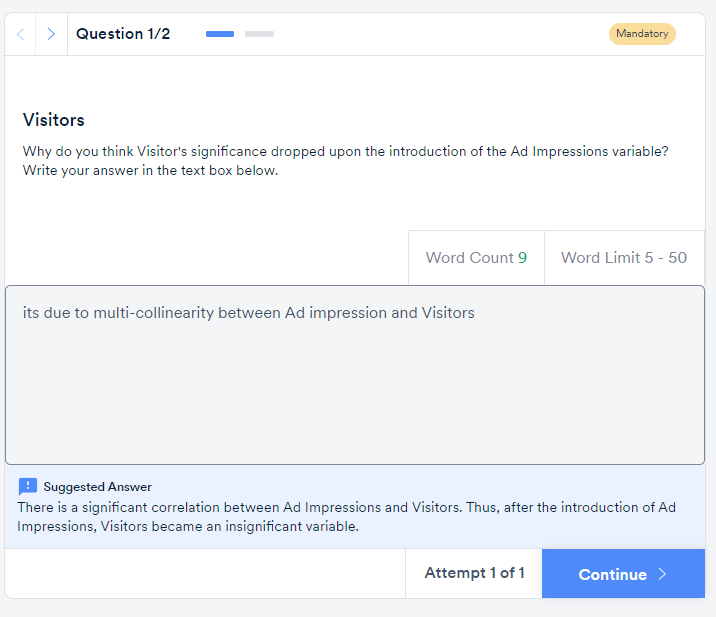

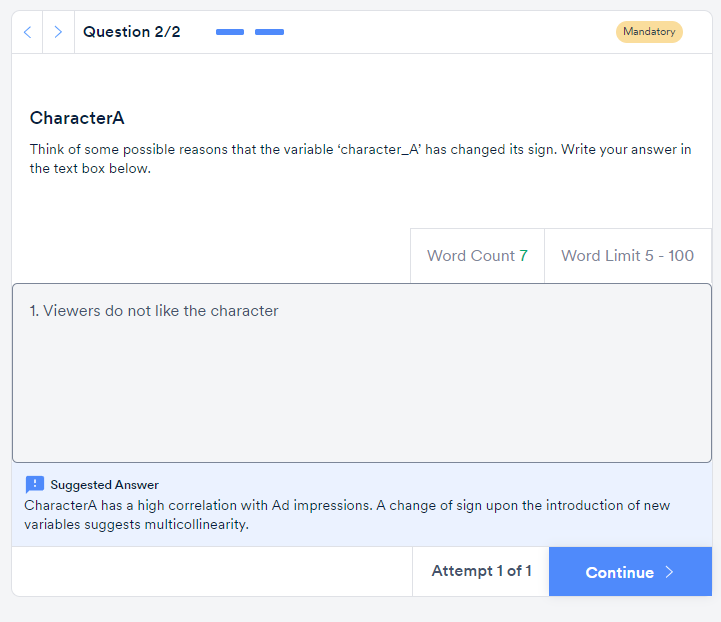